# クラスタリングと次元縮約

## 1. クラスタリング

まず、分かりやすさのため、2次元のデータから始めます。example1.csv を読み込みましょう。

In [1]:
import pandas as pd

df = pd.read_csv('example1.csv')

In [2]:
df

,x,y
0,0.489278,-1.465402
1,1.084429,0.346588
2,0.713579,-0.602240
3,-0.832226,0.529294
4,1.139711,0.411306
...,...,...
295,3.202413,-3.564732
296,2.925788,-3.559647
297,3.683863,-3.377015
298,1.939138,-4.066593


散布図を描画すると分かるように、このデータは3つのクラスターを持ちます。

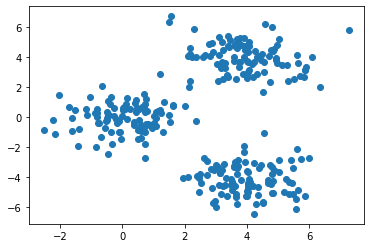

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])

では、**k-means法**でクラスタリングを行いましょう。まず、`to_numpy`メソッドを使って、Pandasのデータフレーム（`pandas.DataFrame`）をNumpyの配列（`numpy.ndarray`）に変換します。

In [ ]:
array = df.to_numpy()

そして、Scikit-learnライブラリの`KMeans`クラスを読み込みましょう。

In [4]:
from sklearn.cluster import KMeans

KMeansクラスは以下のように使います。1行目でオブジェクト（メソッドを持つ変数）を作り、2行目でデータを学習し、3行目でクラスターの分類を行います。

In [ ]:
obj = KMeans(n_clusters=3)
obj.fit(array)
label = obj.predict(array)

変数`label`は、ぞれぞれのデータが何番目のクラスターに分類されるかを表します。

In [5]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

クラスターが正しく予測されていることを確認するため、クラスターごとに色分けして散布図を描画してみます。このとき、`df[label==i]`とは、データフレーム`df`のうち`label==i`を満たす行のみを取り出したものを意味します。

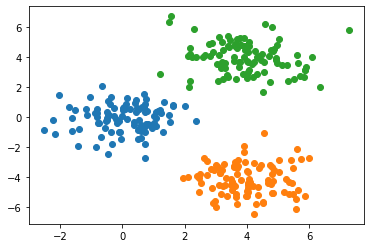

In [6]:
for i in range(3):
    df_i = df[label==i]
    plt.scatter(df_i['x'], df_i['y'])

また、クラスタごとに基本統計量を確認しましょう。

In [7]:
for i in range(3):
    df_i = df[label==i]
    print(df_i.describe())

               x          y
count  98.000000  98.000000
mean    0.060903  -0.074551
std     0.973605   0.910688
min    -2.514797  -2.714391
25%    -0.504688  -0.617009
50%     0.127409  -0.005716
75%     0.727840   0.570873
max     2.365482   2.052155
                x           y
count  100.000000  100.000000
mean     3.969738   -4.181502
std      0.945341    1.002182
min      1.939138   -6.473587
25%      3.295393   -4.944237
50%      3.918697   -4.313725
75%      4.698660   -3.383851
max      6.001850   -1.031965
                x           y
count  102.000000  102.000000
mean     3.932464    3.993276
std      1.114373    1.029489
min      1.220992    1.681080
25%      3.254149    3.257323
50%      3.919191    4.031277
75%      4.568856    4.735241
max      7.259374    6.748811


次に、4次元のデータ、example2.csv についても同様にクラスタリングできるか試してみましょう。

In [8]:
df2 = pd.read_csv('example2.csv')

In [9]:
df2

,x,y,z,w
0,-2.086409,-1.886200,-0.463275,3.835854
1,0.866558,2.727491,0.898473,1.653856
2,-0.196398,0.020009,0.648465,1.917651
3,1.016822,-0.339245,0.318655,-2.568241
4,1.214924,3.795342,0.586563,0.570662
...,...,...,...,...
295,1.167313,2.710088,7.468594,10.432630
296,-1.321408,2.101994,6.265246,11.148877
297,1.548860,2.998376,6.441761,9.729039
298,-2.956160,0.081189,7.361608,10.616915


In [10]:
array = df2.to_numpy()
obj = KMeans(n_clusters=3)
obj.fit(array)
label = obj.predict(array)

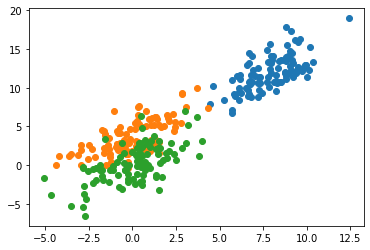

In [11]:
for i in range(3):
    df_i = df2[label==i]
    plt.scatter(df_i['x'], df_i['y'])

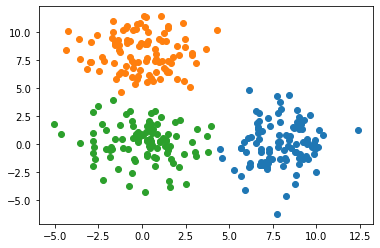

In [12]:
for i in range(3):
    df_i = df2[label==i]
    plt.scatter(df_i['x'], df_i['z'])

In [13]:
for i in range(3):
    df_i = df2[label==i]
    print(df_i.describe())

                x           y           z           w
count  100.000000  100.000000  100.000000  100.000000
mean     7.918779   11.989980    0.010909   -4.069663
std      1.432182    2.265093    1.950337    2.808558
min      4.458229    6.738286   -6.251051  -12.622773
25%      6.772327   10.665651   -1.298473   -6.070746
50%      7.939437   11.901742   -0.105981   -3.951900
75%      9.007564   13.338934    1.343818   -2.149796
max     12.398111   18.968683    4.864064    2.471828
                x           y           z           w
count  100.000000  100.000000  100.000000  100.000000
mean    -0.060682    3.670075    8.196051   12.435321
std      1.737599    2.263269    1.671907    2.387529
min     -4.349588   -0.323459    4.646544    7.398517
25%     -1.226893    1.969107    6.829391   10.617001
50%     -0.111016    3.184971    8.103656   12.431385
75%      1.153518    5.237816    9.358867   14.059997
max      4.317996    9.907428   11.447251   17.877503
                x           

以上の分析では、クラスター数は3に固定していましたが、一般にクラスター数はあらかじめ分かりません。そこで、適切なクラスター数をデータから決定する必要があります。その方法として、**エルボー図**を紹介します。

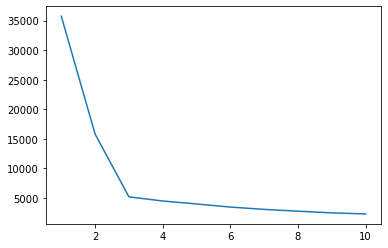

In [14]:
sse = []
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n in n_clusters:
    obj = KMeans(n_clusters=n)
    obj.fit(array)
    sse.append(obj.inertia_)

plt.plot(n_clusters, sse)

## 2. 次元縮約

4次元のデータ example2.csv を2次元に次元縮約し、データの構造（クラスター）が適切に可視化されるか確認します。まず、正解のクラスターを変数`label`として定義しておきましょう。

In [15]:
import numpy as np

label = np.array([0]*100 + [1]*100 + [2]*100)

まず、次元縮約の伝統的な手法である**主成分分析**を適用しましょう。

In [16]:
from sklearn.decomposition import PCA

array = df2.to_numpy()
obj = PCA(n_components=2)
obj.fit(array)
array2 = obj.transform(array)

2つの主成分を使って散布図を描画すると、データの構造がよく分かります。

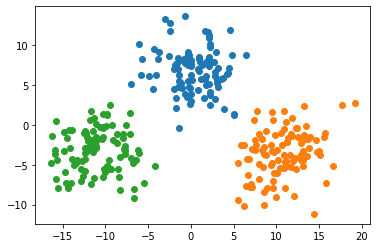

In [17]:
for i in range(3):
    array_i = array2[label==i,:]
    plt.scatter(array_i[:,0], array_i[:,1])

しかし、主成分分析は線形なデータのみに有効な手法であり、複雑な構造を持つデータに不向きです。複雑な構造を持つデータの例として、example3.csv を取り上げましょう。

In [18]:
df3 = pd.read_csv('example3.csv')

In [19]:
df3

,x,y,z,w
0,-2.000980,0.366120,-0.855036,-1.324008
1,0.634057,1.691054,0.308288,-0.432322
2,2.112724,-0.992574,0.772441,0.350875
3,-2.021831,1.164650,-1.579352,-0.378416
4,0.876491,1.027514,0.222287,0.436926
...,...,...,...,...
295,-41.164755,6.741201,38.004076,-9.197782
296,-41.587894,4.146559,28.068356,-9.278461
297,-36.288341,9.675719,53.388664,-10.203274
298,-66.338348,-1.882243,12.864269,-16.266100


このデータの場合、主成分分析の結果はデータの構造が分かりにくいものになります。

In [20]:
array = df3.to_numpy()
obj = PCA(n_components=2)
obj.fit(array)
array2 = obj.transform(array)

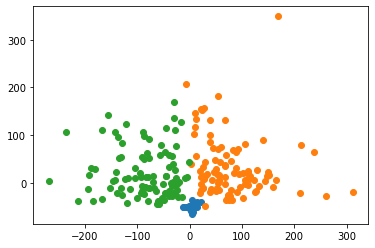

In [21]:
for i in range(3):
    array_i = array2[label==i,:]
    plt.scatter(array_i[:,0], array_i[:,1])

では、主成分分析の代わりに、近年提案されたt-SNEという手法を利用してみましょう。この手法を使えば、複雑な構造を持つデータであっても、データの構造が分かりやすい結果が得られる場合が多いです。

In [22]:
from sklearn.manifold import TSNE

array = df3.to_numpy()
array2 = TSNE(n_components=2).fit_transform(array)

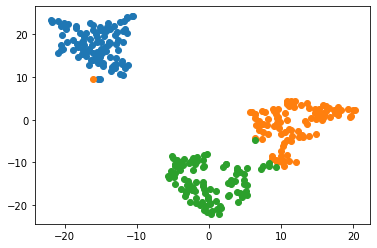

In [23]:
for i in range(3):
    array_i = array2[label==i,:]
    plt.scatter(array_i[:,0], array_i[:,1])